<a href="https://colab.research.google.com/github/reireu/for-copy/blob/main/dnm2_05s_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# データと数理II 第05回 「フーリエ級数展開」


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
import numpy as np
from matplotlib.animation import ArtistAnimation
from IPython.display import HTML, Audio
import random

import sympy as sym
# Jupyter Notebook上で、レンダリングされた結果を表示する
sym.init_printing()

## 波の重ね合わせ

### 1.音をsin波から作る
- Jupyter Notebook で音声データを HTML の表の中に埋め込んで再生できるようにする
    - https://qiita.com/mzmttks/items/52a790071f40b6396fc7

In [ ]:
# 初期設定
duration = 1
fs = 16000
f0s = [440, 880, 1320]

# HTML Table の生成
html = "<table><tr><th>F0</th><th>音声</th></tr>"
for f0 in f0s:
    # Audio オブジェクトの生成
    wave = np.sin(f0 * 2 * np.pi * np.linspace(0, duration, duration * 16000))
    audio_obj = Audio(data=wave, rate=fs)

    # Audio オブジェクトの埋め込み
    html += """
    <tr><td>%s Hz</td><td>
        <audio controls>
            <source src="%s" type="audio/wav" volume="0.5">
        </audio></td>
    </tr>
    """ % (f0, audio_obj.src_attr())

# Table を閉じる
html += "</table>"

HTML(html)

### 2. 各周波数を混ぜてみる

In [ ]:
# 初期設定
duration = 1
fs = 16000
base = 440
f0s = [880, 1320, 1760]

wave = np.sin(base * 2 * np.pi * np.linspace(0, duration, duration * 16000))

# HTML Table の生成
html = "<table><tr><th>Freq</th><th>音声</th></tr>"
for f0 in f0s:
    # Audio オブジェクトの生成
    wave += np.sin(f0 * 2 * np.pi * np.linspace(0, duration, duration * 16000))

audio_obj = Audio(data=wave, rate=fs)
# Audio オブジェクトの埋め込み
html += """
<tr><td>%s Hz</td><td>
    <audio controls>
        <source src="%s" type="audio/wav" volume="0.5">
    </audio></td>
</tr>
""" % ("mixed", audio_obj.src_attr())

html += "</table>"

HTML(html)

どういう音として聴こえましたか。

### 3. 各周波数をランダムに混ぜてみる

In [ ]:
print(random.random())
print(random.random())
print(random.random())

0.5200978506134635
0.22671936113080604
0.45234605980206877


----
### 問1. 基本周波数に3つの(倍音の)周波数をランダムに混ぜるプログラムを作る

----

In [ ]:
#ここに書く
# 初期設定
duration = 1
fs = 16000
base = 440
f0s = [880, 1320, 1760]

wave = np.sin(base * 2 * np.pi * np.linspace(0, duration, duration * 16000))

# HTML Table の生成
html = "<table><tr><th>Freq</th><th>音声</th></tr>"
for f0 in f0s:
    # Audio オブジェクトの生成
    wave += random.random()*np.sin(f0 * 2 * np.pi * np.linspace(0, duration, duration * 16000))

audio_obj = Audio(data=wave, rate=fs)
# Audio オブジェクトの埋め込み
html += """
<tr><td>%s Hz</td><td>
    <audio controls>
        <source src="%s" type="audio/wav" volume="0.5">
    </audio></td>
</tr>
""" % ("mixed", audio_obj.src_attr())

html += "</table>"

HTML(html)

## 三角関数の微分積分

### sinとcosのおさらい

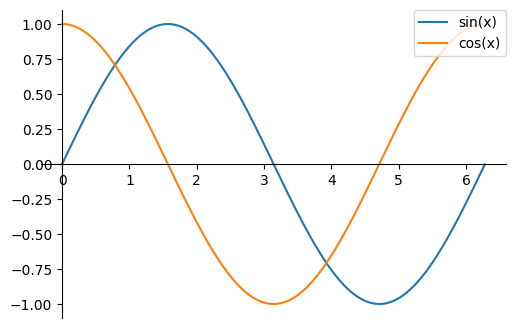

In [ ]:
def here_function1(x):
    y = np.sin(x)
    return y

def here_function2(x):
    y = np.cos(x)
    return y

start = 0 #定義域の左端
last = 2*np.pi # 定義域の右端

x = np.arange(start,last, 0.01)
y1 = here_function1(x)
y2 = here_function2(x)

fig = plt.figure(figsize=(6,4)) # サイズを横長にしたほうが見やすい。
ax = fig.add_subplot(1,1,1)
#ax.set_aspect('equal')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
#ax.axis([-1.0,7.0,-0.0,10.0])
#ax.grid()

ax.plot(x, y1, label='sin(x)') # 描画
ax.plot(x, y2, label='cos(x)') # 描画
ax.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=10) # ラベルの反映

plt.show()

### sympyのおさらい

In [ ]:
x = sym.Symbol('x') # 変数を一個ずつ指定
y = sym.Symbol('y') # 変数を一個ずつ指定
a, b, c = sym.symbols('a b c') # 変数をまとめて指定("Symbol"じゃなくて"symbols"になってる)

f = sym.sin(x) # 関数の定義

display(f) #表示
display(sym.Eq(sym.Symbol('f(x)'),f)) # きれいに表示する用

sin(x)

f(x) = sin(x)

### 5. sinとcosの積分

In [ ]:
sym.integrate(sym.sin(x), (x, 0, 2*sym.pi))

0

In [ ]:
sym.integrate(sym.cos(x), (x, 0, 2*sym.pi))

0

### 6. 関数を受け取ってそれを(数値から)積分する関数

In [ ]:
def func_and_integrate(func, last= 2*np.pi):
    here_function = func

    def return_lower2(y1,y2):
        if np.sign(y1) * np.sign(y2) == -1: # 長方形の左端と右端で符号が違うときは0
            yi = 0
        elif np.abs(y2) > np.abs(y1):
            yi = y1
        else:
            yi = y2

        return yi

    start = 0
    #last = 2 * np.pi

    x0 = np.arange(start,last, 0.01)
    y0 = here_function(x0)

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    #ax.set_aspect('equal') # 見にくかったら外しても良い
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.axis([0.0,7.0,-2.0,2.0])

    dx = 0.05
    x = np.arange(start,last, dx)
    y = here_function(x)

    area_sum = 0

    for i in range(len(x)):
        if x[i] + dx > last:
            continue

        y1 = y[i]
        y2 = here_function(x[i]+ dx)
        yi = return_lower2(y1, y2)

        r = patches.Rectangle(xy=(x[i], 0), width=dx, height=yi, ec='#000000', fc='#EEEEEE')
        ax.add_patch(r)
        area_sum += yi * dx

    ax.plot(x0, y0)

    #ax.axis([-1.0,5.0,-1.0,20.0]) # 見にくかったら外しても良い
    plt.show()
    print("area_sum: ", '{:.6f}'.format(area_sum))

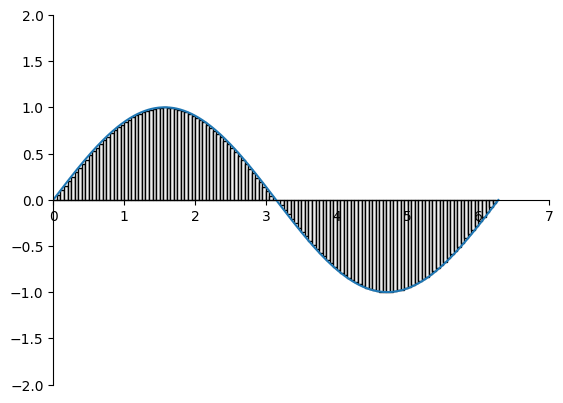

area_sum:  -0.000272


In [ ]:
def here_function(x):
    y = np.sin(x)
    return y
func_and_integrate(here_function)

### 7. lambda式(無名関数)を使った関数の指定

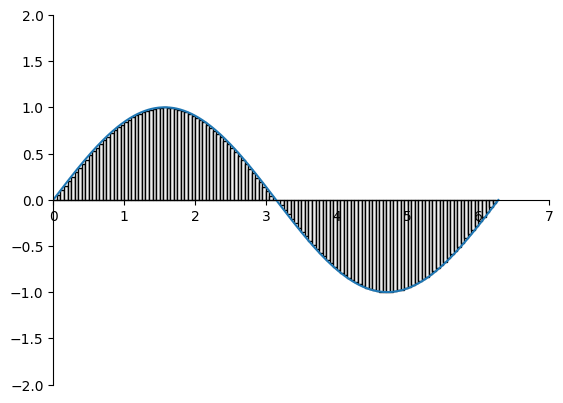

area_sum:  -0.000272


In [ ]:
func_and_integrate(lambda x: np.sin(x))

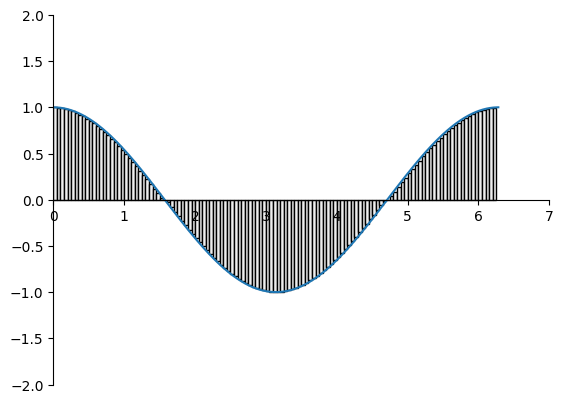

area_sum:  -0.033160


In [ ]:
func_and_integrate(lambda x: np.cos(x))

値を確認する。(本来はいくつになる？)

### 8.三角関数の合成関数の積分

----
### 問2. 以下の関数を上のマネして積分せよ

----

- sin2xを積分してみる
- cos2xを
- sinx*cosxを
- sinx*sinxを

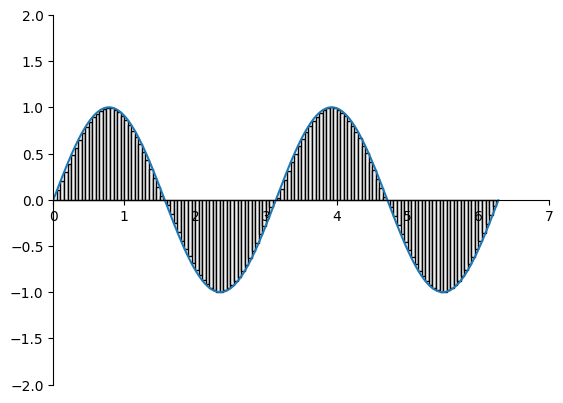

area_sum:  -0.000488


In [ ]:
func_and_integrate(lambda x: np.sin(2*x))

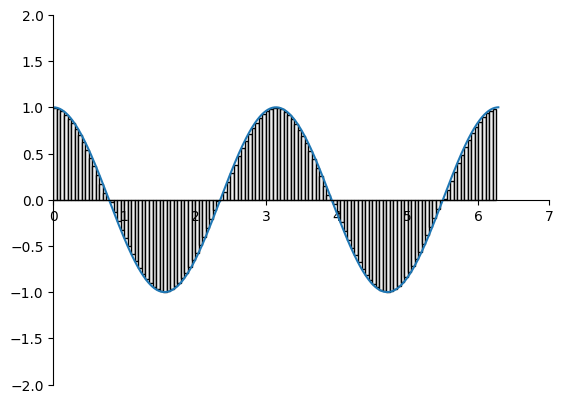

area_sum:  -0.033130


In [ ]:
func_and_integrate(lambda x: np.cos(2*x))

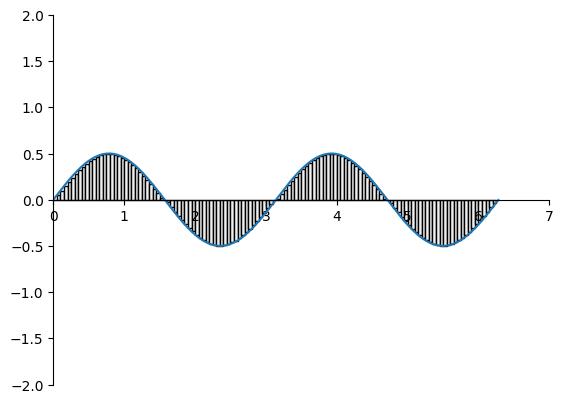

area_sum:  -0.000244


In [ ]:
func_and_integrate(lambda x: np.sin(x)*np.cos(x))

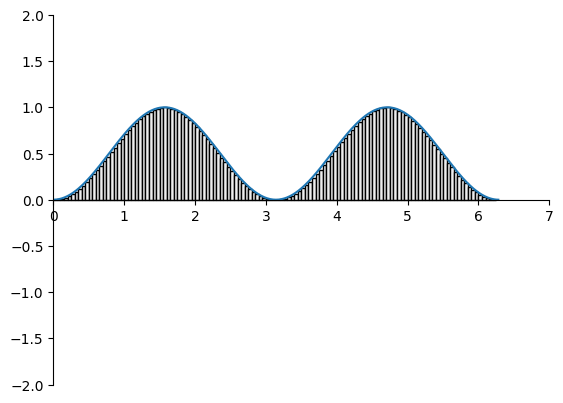

area_sum:  3.041627


In [ ]:
func_and_integrate(lambda x: np.sin(x)*np.sin(x))

### 9.sympyで確認してみる(三角関数の合成関数の積分)
- sin(x) * sin(x)
- cos(x) * cos(x)

In [ ]:
x = sym.Symbol('x') # 変数を一個ずつ指定
display(sym.integrate(sym.sin(x)*sym.sin(x), (x, 0, 2*sym.pi)))

π

In [ ]:
x = sym.Symbol('x') # 変数を一個ずつ指定
display(sym.integrate(sym.cos(x)*sym.cos(x), (x, 0, 2*sym.pi)))

π

### 10.三角関数の合成関数の積分2

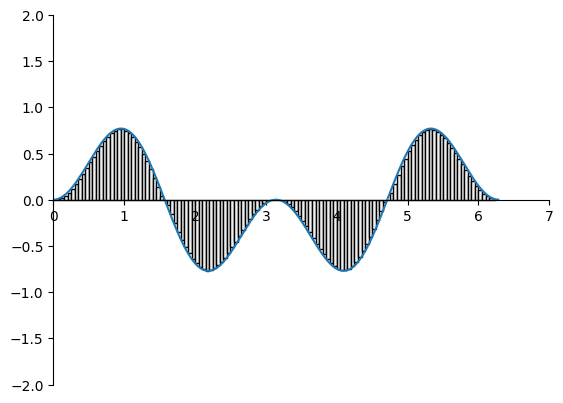

area_sum:  0.000033


In [ ]:
# sin(x) * sin(2x)
func_and_integrate(lambda x: np.sin(x)*np.sin(2*x))

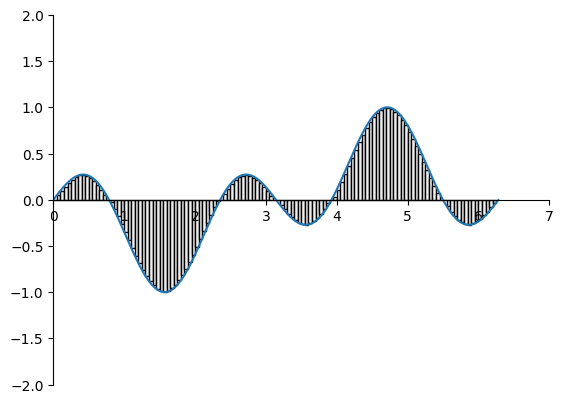

area_sum:  -0.000257


In [ ]:
# sin(x) * cos(2x)
func_and_integrate(lambda x: np.sin(x)*np.cos(2*x))

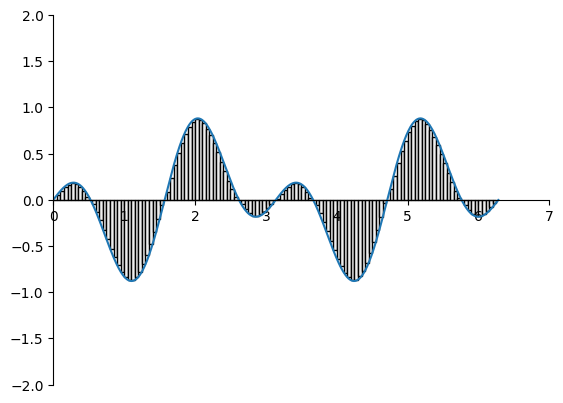

area_sum:  -0.000046


In [ ]:
# sin(x) * cos(3x)
func_and_integrate(lambda x: np.sin(x)*np.cos(3*x))

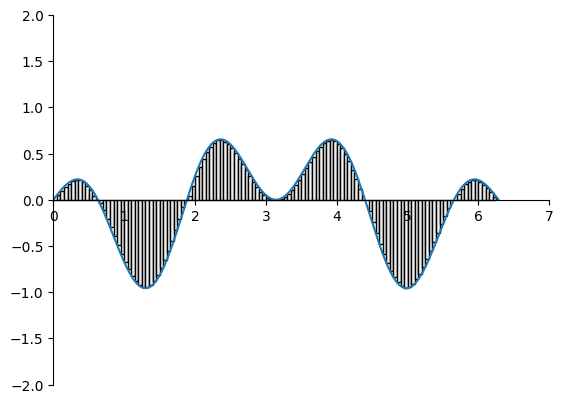

area_sum:  -0.372572


In [ ]:
# sin(x) * cos(2.5x) # 整数倍ではない
func_and_integrate(lambda x: np.sin(x)*np.cos(2.5*x))

### 11. 三角関数に三角関数を掛けたときの積分のまとめ

----

### 問3. nを1〜5,mを1〜5として、以下の式を0から2piまで積分したものがどうなるか、行列でまとめてみよ。

- sin(nx)*sin(mx)
- cos(nx)*cos(mx)
- sin(nx)*cos(mx)


In [ ]:
# sin(nx)*sin(mx)
n=5
m=5
x = sym.Symbol('x') # 変数を一個ずつ指定
dummy = list(range(n*m))
for i in range(n):
    for j in range(m):
        result[i,j] =sym.integrate(sym.sin((i+1)*x)*sym.sin((j+1)*x), (x, 0, 2*sym.pi))

result

NameError: name 'result' is not defined

In [ ]:
# cos(nx)*cos(mx)
n=5
m=5
x = sym.Symbol('x') # 変数を一個ずつ指定
dummy = list(range(n*m))
for i in range(n):
    for j in range(m):
        result[i,j] =sym.integrate(sym.cos((i+1)*x)*sym.cos((j+1)*x), (x, 0, 2*sym.pi))

result


NameError: name 'result' is not defined

In [ ]:
# sin(nx)*cos(mx)

n=5
m=5
x = sym.Symbol('x') # 変数を一個ずつ指定
dummy = list(range(n*m))
for i in range(n):
    for j in range(m):
        result[i,j] =sym.integrate(sym.sin((i+1)*x)*sym.cos((j+1)*x), (x, 0, 2*sym.pi))

result

NameError: name 'result' is not defined

## 合成された三角関数から、波長ごとの三角関数の重みを抽出する
### 11. 合成した三角関数の表示

In [ ]:
def plt_func(func):
    here_function1 = func
    start = 0 #定義域の左端
    last = 2*np.pi # 定義域の右端

    x = np.arange(start,last, 0.01)
    y1 = here_function1(x)

    fig = plt.figure(figsize=(6,4)) # サイズを横長にしたほうが見やすい。
    ax = fig.add_subplot(1,1,1)
    #ax.set_aspect('equal')

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    #ax.axis([-1.0,7.0,-0.0,10.0])
    #ax.grid()

    ax.plot(x, y1, label="input") # 描画
    ax.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=10) # ラベルの反映

    plt.show()

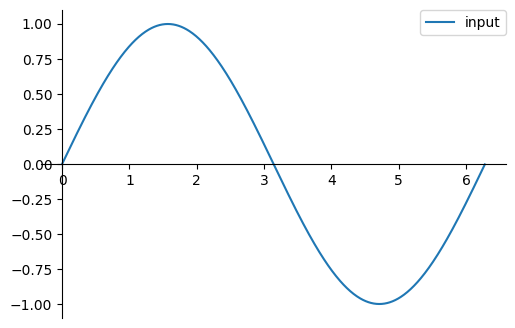

In [ ]:
plt_func(lambda x: np.sin(x))

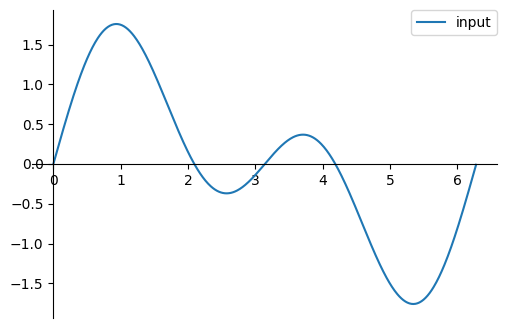

In [ ]:
plt_func(lambda x: np.sin(x)+np.sin(2*x))

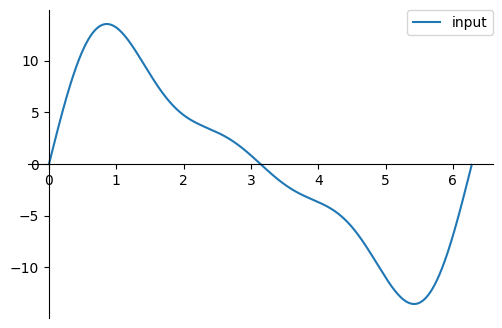

In [ ]:
plt_func(lambda x: 10*np.sin(x)+5*np.sin(2*x)+2*np.sin(3*x))

### 12. ノコギリ波(直線の三角関数での表現)

$y = \sum_{k=1}^n \frac{2}{k}(-1)^{(k+1)}sin(kx)$

In [ ]:
def nokogiri(n):
    start = 0 #定義域の左端
    last = 2*np.pi # 定義域の右端

    x = np.arange(start,last, 0.01)
    total_y = np.array([0.0 for xi in x])

    for k in range(1,n+1):
        total_y += (2/k) * (-1)**(k) * np.sin(k*x)

    y1 = total_y

    fig = plt.figure(figsize=(6,4)) # サイズを横長にしたほうが見やすい。
    ax = fig.add_subplot(1,1,1)
    #ax.set_aspect('equal')

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    #ax.axis([-1.0,7.0,-0.0,10.0])
    #ax.grid()

    ax.plot(x, y1, label='n: '+str(n)) # 描画
    ax.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=10) # ラベルの反映

    plt.show()


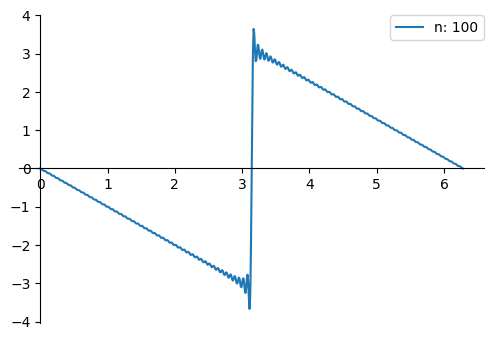

In [ ]:
nokogiri(100)

### 13.ノコギリ波のアニメーション化

In [ ]:
def nokogiri_ani(n):
    start = 0 #定義域の左端
    last = 2*np.pi # 定義域の右端

    x = np.arange(start,last, 0.01)
    total_y = np.array([0.0 for xi in x])

    fig = plt.figure(figsize=(6,4)) # サイズを横長にしたほうが見やすい。
    ax = fig.add_subplot(1,1,1)
    #ax.set_aspect('equal')

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    #ax.axis([-1.0,7.0,-0.0,10.0])
    #ax.grid()


    artist_list = []

    for k in range(1,n+1):
        total_y += (2/k) * (-1)**(k) * np.sin(k*x)
        y1 = total_y
        art = ax.plot(x,y1, color='blue')

        artist_list.append(art)

    ani = ArtistAnimation(fig, artist_list, interval = 100)

    plt.close()
    display(HTML(ani.to_jshtml()))
    ani.save('./anime6-1.mp4', writer="ffmpeg") # mp4で保存


In [ ]:
nokogiri_ani(50)

### 14. 合成元の三角関数の積分による抽出(Sympyによる確認)

In [ ]:
x = sym.Symbol('x')
# sin(x)の積分
display(sym.integrate(sym.sin(x), (x,0, 2*sym.pi)))

# 合成関数の定義
# 10sin(x) + 5sin(2x) + 2sin(3x)
f = 10*sym.sin(x)+5*sym.sin(2*x)+2*sym.sin(3*x)

# fの積分
display(sym.integrate(f, (x,0, 2*sym.pi)))

0

0

In [ ]:
# sin(x)成分を取り出す
display(sym.integrate(sym.sin(x)*f, (x,0, 2*sym.pi)))

# sin(2x)成分を取り出す
display(sym.integrate(sym.sin(2*x)*f, (x,0, 2*sym.pi)))

# sin(3x)成分を取り出す
display(sym.integrate(sym.sin(3*x)*f, (x,0, 2*sym.pi)))

10⋅π

5⋅π

2⋅π

In [ ]:
# sin(4x)成分を取り出す
display(sym.integrate(sym.sin(4*x)*f, (x,0, 2*sym.pi)))

# cos(x)成分を取り出す
display(sym.integrate(sym.cos(x)*f, (x,0, 2*sym.pi)))

# sin(2x)成分を取り出す
display(sym.integrate(sym.cos(2*x)*f, (x,0, 2*sym.pi)))

# sin(3x)成分を取り出す
display(sym.integrate(sym.cos(3*x)*f, (x,0, 2*sym.pi)))


0

0

0

0

## フーリエ級数展開
### 15.フーリエ級数展開の公式の確認



----
- フーリエ級数展開の公式と意味 | 高校数学の美しい物語
    - https://mathtrain.jp/fourierseries


$f(x)$ が周期 $T$ の「まともな」関数なら

 $f(x)=\dfrac{a_0}{2}+\displaystyle\sum_{n=1}^{\infty}\left(a_n\cos \dfrac{2\pi n x}{T}+b_n\sin \dfrac{2\pi nx}{T}\right)$

ただし，

$a_n=\dfrac{2}{T}\displaystyle\int_0^{T}f(x)\cos\dfrac{2\pi nx}{T}dx$

$b_n=\dfrac{2}{T}\displaystyle\int_0^{T}f(x)\sin\dfrac{2\pi nx}{T}dx$

----

なお、$a_0$は

$a_0=\dfrac{2}{T}\displaystyle\int_0^Tf(x)dx$

となる。つまり元の式の第一項の$\frac{a_0}{2}$は、

$\frac{a_0}{2}=\dfrac{1}{T}\displaystyle\int_0^Tf(x)dx$

これは、関数$f(x)$を0からTの区間で積分してTで割ることなので、要は関数$f(x)$の平均成分のことである。
(面積を求めて底辺で割ってる)

----

ここで、今は$T = 2\pi$、$a_0 = 0$である。






代入してみると

$f(x)=\displaystyle\sum_{n=1}^{\infty}\left(a_n\cos{n x}+b_n\sin{nx}\right)$

$a_n=\dfrac{1}{\pi}\displaystyle\int_0^{T}f(x)\cos{n x}dx$

$b_n=\dfrac{1}{\pi}\displaystyle\int_0^{T}f(x)\sin{nx}dx$


----

## フーリエ級数展開(Fourier Series Expansion)の関数を作る

### 再現する関数の定義

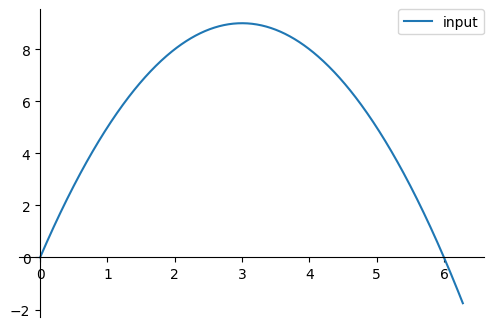

In [ ]:
plt_func(lambda x: -(x - 3) ** 2 + 9)

ここでは、0から6までを周期とする。つまり$T=6$とする。

### 16.まずは平均成分を求める

In [ ]:
def fse0(func, start, T):
    dx = 0.01
    x = np.arange(start, T, dx)
    y_base = func(x)

    a0 = 2 * np.average(y_base)
    y_ave = np.array([a0 / 2 for xi in x]) # 同じ値を並べてるだけ

    print('a0: ', a0)

    fig = plt.figure(figsize=(6,4)) # サイズを横長にしたほうが見やすい。
    ax = fig.add_subplot(1,1,1)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')

    ax.plot(x, y_base, label='base_function') # 描画
    ax.plot(x, y_ave, label='ave') # 描画

    ax.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=10) # ラベルの反映

    plt.show()


a0:  11.999966666666667


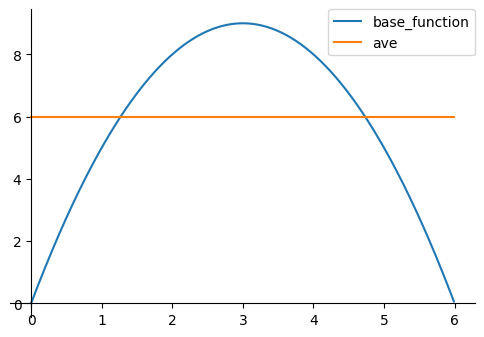

In [ ]:
fse0(lambda x: -(x - 3) ** 2 + 9, 0, 6.0)

### sympyで本来の値がいくつなのか確認

$a_0=\dfrac{2}{T}\displaystyle\int_0^Tf(x)dx$

In [ ]:
x = sym.Symbol('x')
f = -(x - 3) ** 2 + 9
a0 = (2/6)*sym.integrate(f, (x, 0, 6))
display(a0)

12.0000000000000

## 係数a1,b1を求める

### 17.まずはa1がsympyでいくつになるか確認

$a_n=\dfrac{2}{T}\displaystyle\int_0^{T}f(x)\cos\dfrac{2\pi nx}{T}dx$

$T=6, n=1$ を代入


$a_1 = \dfrac{2}{6}\displaystyle\int_0^{6}f(x)\cos\dfrac{2\pi x}{6}dx$




In [ ]:
x = sym.Symbol('x') # 変数を一個ずつ指定
f = -(x - 3) ** 2 + 9
display((2/6)*sym.integrate(f*sym.cos(2*sym.pi*x/6), (x, 0, 6)))


-36.0 
──────
   2  
  π   

In [ ]:
sym.N(sym.pi,10)

3.141592654

In [ ]:
a1 = (2/6)*sym.integrate(f*sym.cos(2*sym.N(sym.pi,10)*x/6), (x, 0, 6))
display(a1)

-3.64756261114962

In [ ]:
b1 = (2/6)*sym.integrate(f*sym.sin(2*sym.N(sym.pi,10)*x/6), (x, 0, 6))
display(b1)

3.39544688661893e-11

これはb1=0と見なして良い。

### 18. グラフを表示して確認


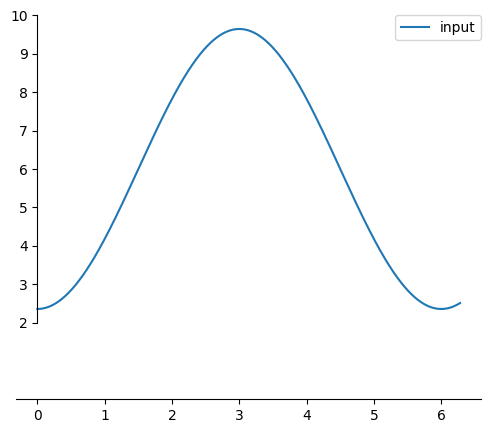

In [ ]:
plt_func(lambda x:  6.0 + a1 * np.cos(2*np.pi*x/6))

#### 二つの関数を引数に渡して両方表示する関数

In [ ]:
def plt_2func(func1,func2):
    here_function1 = func1
    here_function2 = func2
    start = 0 #定義域の左端
    last = 2*np.pi # 定義域の右端

    x = np.arange(start,last, 0.01)
    y1 = here_function1(x)
    y2 = here_function2(x)

    fig = plt.figure(figsize=(6,4)) # サイズを横長にしたほうが見やすい。
    ax = fig.add_subplot(1,1,1)
    #ax.set_aspect('equal')

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    #ax.axis([-1.0,7.0,-0.0,10.0])
    #ax.grid()

    ax.plot(x, y1, label="input1") # 描画
    ax.plot(x, y2, label="input2") # 描画
    ax.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=10) # ラベルの反映

    plt.show()

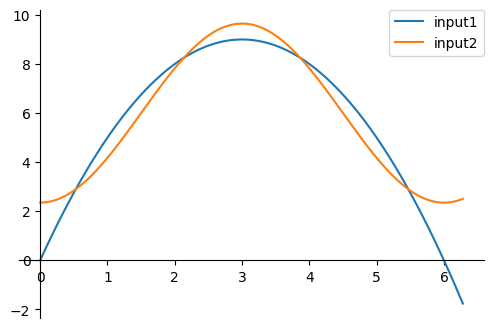

In [ ]:
plt_2func(lambda x: -(x - 3) ** 2 + 9, lambda x:  6.0 + a1 * np.cos(2*np.pi*x/6))

まあまあフィッティングしていることが分かる。

### 19.第一成分のcosの係数a1を求める(ベクトル演算)

----

### 問4. 下の関数fse1cを定義する。a1を求める式を書け

----
- コンピュータでは、与えられるデータが普通は離散的なので、本当の積分はできない。
- 積分ではなく、足し合わせで表現する
- 足し合わせの中に掛け算がある場合、各要素を掛けて足していくことになる
    - それって実はベクトルの内積



In [ ]:
def fse1c(func, start, T):
    dx = 0.01
    x = np.arange(start, T,dx)
    y_base = func(x)
    cos1 = np.cos(2*np.pi*x /T)

    a0 = 2 * np.average(y_base)
    y_ave = np.array([a0 / 2 for xi in x]) # 同じ値を並べてるだけ

    ########
    # ここでa1を定義

    ########

    print('a1: ',a1)
    y_cos1 = a1 * np.cos(2*np.pi/T*x)

    y_total = y_ave + y_cos1

    fig = plt.figure(figsize=(6,4)) # サイズを横長にしたほうが見やすい。
    ax = fig.add_subplot(1,1,1)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')

    ax.plot(x, y_base, label='base_function') # 描画
    ax.plot(x, y_ave, label='ave') # 描画
    ax.plot(x, y_cos1, label='cos1') # 描画
    ax.plot(x, y_total, label='total') # 描画
    ax.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=10) # ラベルの反映

    plt.show()

a1:  -3.64756261114962


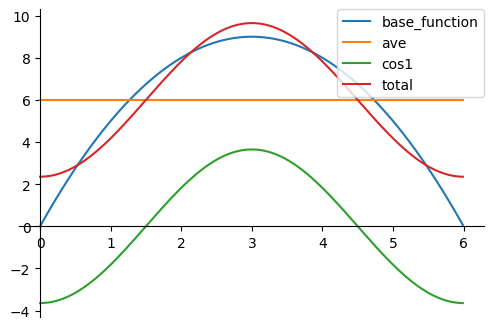

In [ ]:
fse1c(lambda x: -(x - 3) ** 2 + 9, 0, 6.0)

### ヒント
- 合成関数である式A✕式Bを積分するということは、各xにおける式Aの値と式Bの値を掛けて、dxを掛けることに相当する。
- あるxで求まる式A✕式Bで求まる数値はその地点でのy(高さ)で、dxはx(横幅)ということになる。

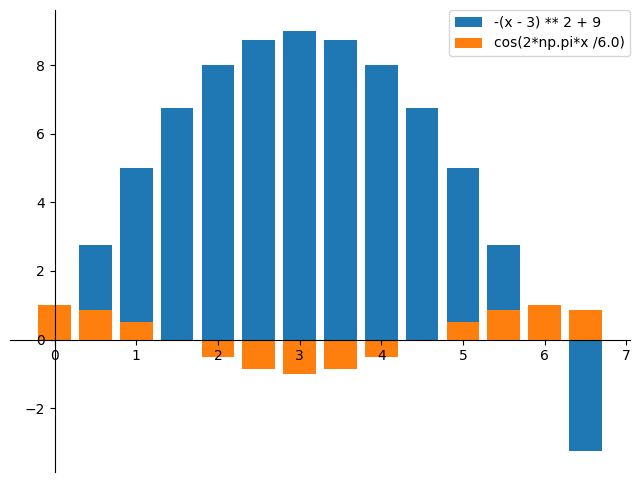

In [ ]:
def here_function1(x):
    y = -(x - 3) ** 2 + 9
    return y

def here_function2(x):
    y = np.cos(2*np.pi*x /6.0)
    return y

start = 0 #定義域の左端
last = 7 # 定義域の右端

x = np.arange(start,last, 0.5)
y1 = here_function1(x)
y2 = here_function2(x)

fig = plt.figure(figsize=(8,6)) # サイズを横長にしたほうが見やすい。
ax = fig.add_subplot(1,1,1)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
# ax.axis([-20.0,350.0,-20.0,250.0])

ax.bar(x, y1, label='-(x - 3) ** 2 + 9', width=0.4) # 描画
ax.bar(x, y2, label='cos(2*np.pi*x /6.0)', width=0.4) # 描画
ax.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=10) # ラベルの反映

plt.show()

----

### 問5. 下の関数fse1csを定義する。a1およびb1を求める式を書け

----

In [ ]:
def fse1cs(func, start, T):
    dx = 0.01
    x = np.arange(start, T,dx)
    y_base = func(x)
    cos1 = np.cos(2*np.pi*x/T)
    sin1 = np.sin(2*np.pi*x/T)

    a0 = 2 * np.average(y_base)
    y_ave = np.array([a0 / 2 for xi in x]) # 同じ値を並べてるだけ
    ########
    #ここでa1,b1を定義

    ########

    print('b1: ',b1)
    y_cos1 = a1 * np.cos(2*np.pi/T*x)
    y_sin1 = b1 * np.sin(2*np.pi/T*x)
    y_total = y_ave + y_cos1 + y_sin1

    fig = plt.figure(figsize=(6,4)) # サイズを横長にしたほうが見やすい。
    ax = fig.add_subplot(1,1,1)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')

    ax.plot(x, y_base, label='base_function') # 描画
    ax.plot(x, y_ave, label='ave') # 描画
    ax.plot(x, y_cos1, label='cos1') # 描画
    ax.plot(x, y_sin1, label='sin1') # 描画
    ax.plot(x, y_total, label='total') # 描画
    ax.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=10) # ラベルの反映

    plt.show()

b1:  3.39544688661893e-11


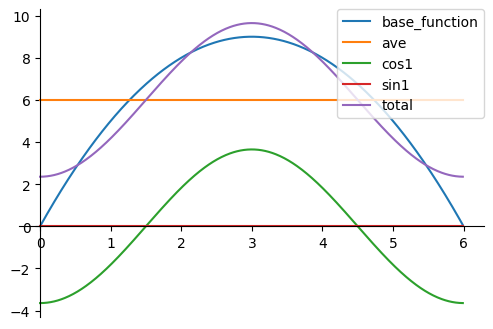

In [ ]:
fse1cs(lambda x: -(x - 3) ** 2 + 9, 0, 6.0)

- 任意の関数を受け取れるので、入力を変更して試してみる
    - sin と cosに分解されるはず

b1:  3.39544688661893e-11


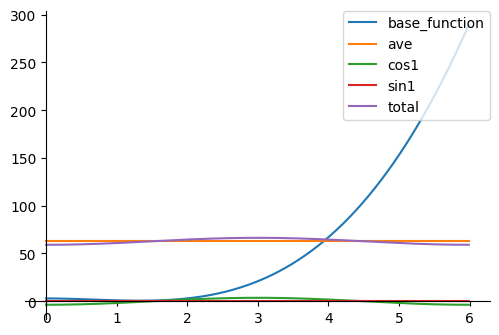

In [ ]:
fse1cs(lambda x: 2*x**3 - 4 * x**2 + 3, 0, 6.0)

----
# 課題5
-　ipynbファイルは共通で一つ提出

## 課題5-1. n次項までのフーリエ級数展開の画像
- 引数に、(関数, 級数の数n, 区間開始点、区間終了点)を取る、フーリエ級数展開を行う関数fseを作り、関数y = -(x - 3) ** 3 + 9をフーリエ級数展開によって近似せよ。条件は上と同じで、区間は[0,6]とする。n=1から5までの結果をグラフで示せ。
    - 一つの画像にして提出せよ(dnm5_1.pngなど)
    - subplotで分割してまとめるのは、してもしなくてもよい

----
## 課題5-2. n次項までのフーリエ級数展開の動画
- 5-1で作った関数でnを増加させて元の関数に近似させていく様子をアニメーションにする関数fse_aniを作り、動画を作成せよ。入力する関数は、課題5-1と同じものと、別のもの一つずつの計2つとする。
    - アニメーションをやや遅くしないと見にくい。
    - ラベルをn=iの形で表示しようと思ったらよく分からなかった(毎回表示されてしまう)ので無くてもよいが、できたら素晴らしい。
    - 2つの動画を提出する。(dnm5_21.mp4, dnm5_22.mp4など)

----
## オプション課題5-3. パルス波のフーリエ級数展開の動画
- f(x) = {1 (0<x<π), 0 (π<x<2π)} (これは、矩形波と呼ばれる波になる。パルスはこういう形)を、区間[0,2π]でフーリエ級数展開せよ。自由に選んだnについて、nを増加させて行く様子の動画を示せ。
    - 動画を一つ提出(dnm5_3.mp4など)
    - 関数fseは関数を受け取る関数なので、そのままでは難しいかもしれない。関数の代わりにnp.arrayの形で受け取る関数を新たに定義したほうがいいかも。しなくてもよい。









